In [1]:
import os
from pathlib import Path
import re
from matplotlib import pyplot as plt  
import json
import numpy as np
import networkx as nx

In [2]:
# the size of the graph
matrix_size = 15
# initial seed of random generator
np.random.seed(42)
# initial graph weight
initial_graph_weight = np.random.randint(3,10,size=(2*matrix_size*(matrix_size-1)))

G = nx.grid_2d_graph(matrix_size, matrix_size)

num_of_graph = 1
num_of_trajectory_each_graph = 100
real_graph_weight = []
generated_trajectory_dataset = []


for i in range(num_of_graph):
    noise = np.random.randint(-3, 3, size=(2*matrix_size*(matrix_size-1)))
    real_graph_weight.append(initial_graph_weight + noise)
#   print(real_graph_weight)

    for j in range(num_of_trajectory_each_graph):
        cnt = 0
        for edge in G.edges():
            G.edges[edge[0],edge[1]]["weight"] = real_graph_weight[i][cnt]
            cnt += 1
#           print("generated a trajectory")
        
        random_pos = np.random.randint(0, matrix_size, size=2)
        start_point = (random_pos[0], random_pos[1])
        random_pos = np.random.randint(0, matrix_size, size=2)
        end_point = (random_pos[0], random_pos[1])
        # code for dp get shorest path 
        trajectory = nx.shortest_path(G, source=start_point, target=end_point, weight="weight")
#         print(start_point, end_point)
#         print(trajectory)
        generated_trajectory_dataset.append(trajectory)

[(4, 6), (4, 5), (4, 4), (5, 4), (6, 4), (7, 4), (8, 4), (18, 4), (19, 4), (20, 4), (21, 4), (22, 4), (22, 3), (23, 3)]


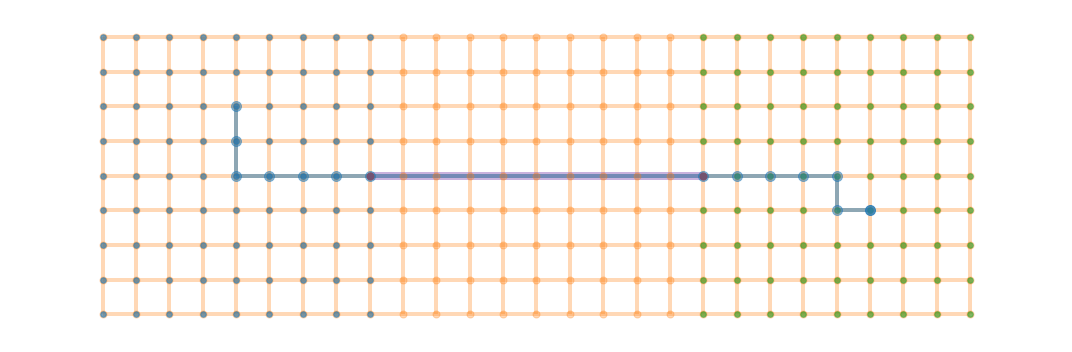

In [3]:
# 这个部门模拟在两个城市中有一条高速公路的场景，A城市想要到 B城市去则必然经过高速公路，
# 在这样的setting下，高速公路一定会成为dictionary中最为重要的一个元素
plt.figure(figsize=(15, 5))
ax = plt.gca()
ax.margins(0.11)
matrix_size = 9
G = nx.grid_2d_graph(matrix_size*3, matrix_size)
pos = dict( (n, n) for n in G.nodes() )
nx.draw_networkx_nodes(G, pos, node_size=50, alpha=0.3, node_color="tab:orange")
nx.draw_networkx_edges(G, pos, alpha=0.3, width=4, edge_color="tab:orange")

startpoint_of_highspeedway=(matrix_size-1,matrix_size//2)
endpoint_of_highspeedway=(matrix_size*2,matrix_size//2)
for i in range(matrix_size):
    for j in range(matrix_size):
        nx.draw_networkx_nodes(G, pos, node_size=30, alpha=0.6, nodelist=[(i,j)], node_color="tab:blue")
        nx.draw_networkx_nodes(G, pos, node_size=30, alpha=0.6, nodelist=[(i+matrix_size*2,j)], node_color="tab:green")
nx.draw_networkx_nodes(G, pos, node_size=50, alpha=0.9, nodelist=[startpoint_of_highspeedway], node_color="tab:red")
nx.draw_networkx_nodes(G, pos, node_size=50, alpha=0.9, nodelist=[endpoint_of_highspeedway], node_color="tab:red")
nx.draw_networkx_edges(G, pos, alpha=0.5, width=8, edgelist=[(startpoint_of_highspeedway,endpoint_of_highspeedway)],edge_color="tab:purple")

generated_trajectory_dataset_highspeedway=[]
np.random.seed(42)
for cnt in range(30):
    random_pos = np.random.randint(0, matrix_size-1, size=4)
    start_point = (random_pos[0], random_pos[1])
    end_point = (random_pos[2]+matrix_size*2, random_pos[3])
    initial_graph_weight = np.random.randint(3,10,size=(matrix_size*(3*matrix_size-1)+3*matrix_size*(matrix_size-1)))
    cnt = 0
    for edge in G.edges():
        G.edges[edge[0],edge[1]]["weight"] = initial_graph_weight[cnt]
        cnt += 1

    tra = nx.shortest_path(G, source=start_point, target=startpoint_of_highspeedway, weight="weight")
#     for i in range(len(tra)-1):
#         nx.draw_networkx_edges(G, pos, alpha=0.5, width=4, edgelist=[(tra[i],tra[i+1])],edge_color="tab:blue")
#         nx.draw_networkx_nodes(G, pos, node_size=100, alpha=0.5, nodelist=[tra[i]], node_color="tab:blue")
#     nx.draw_networkx_nodes(G, pos, node_size=100, alpha=0.8, nodelist=[tra[-1]], node_color="tab:blue")  

    trajectory=tra
    # print(trajectory)
    tra = nx.shortest_path(G, source=endpoint_of_highspeedway, target=end_point, weight="weight")
#     for i in range(len(tra)-1):
#         nx.draw_networkx_edges(G, pos, alpha=0.5, width=4, edgelist=[(tra[i],tra[i+1])],edge_color="tab:blue")
#         nx.draw_networkx_nodes(G, pos, node_size=100, alpha=0.5, nodelist=[tra[i]], node_color="tab:blue")
#     nx.draw_networkx_nodes(G, pos, node_size=100, alpha=0.8, nodelist=[tra[-1]], node_color="tab:blue")
    trajectory=trajectory+tra
    generated_trajectory_dataset_highspeedway.append(trajectory)
# print(tra)
print(trajectory)

tra=trajectory
for i in range(len(tra)-1):
    nx.draw_networkx_edges(G, pos, alpha=0.5, width=4, edgelist=[(tra[i],tra[i+1])],edge_color="tab:blue")
    nx.draw_networkx_nodes(G, pos, node_size=100, alpha=0.5, nodelist=[tra[i]], node_color="tab:blue")
nx.draw_networkx_nodes(G, pos, node_size=100, alpha=0.8, nodelist=[tra[-1]], node_color="tab:blue")

plt.tight_layout()
plt.axis("off")
plt.show()

In [6]:
import time
a=time.time()


In [7]:
print(time.time()-a)

8.83952021598816


In [ ]:
num_point= 3 * matrix_size**2  # the number of vertics
length = matrix_size * 3  # the length of the grid
T_value = -np.ones((num_point, num_point))  # T_value stores an adaption of the number (num) of trajactoy that contain the path (s,t), which is pre-computed ly lb + 1/num
opt_div_value = -np.ones((num_point, num_point))  # store the optimal T_value of all the trajectory
ver_x = np.zeros((num_point, num_point))  # symmetric for (s, t) is equivilent to (t, s), stored the division of each edge
ver_y = np.zeros((num_point, num_point))
la = 1.00  # lambda which impact the number of division for each trajectory
trajectory_each_epoch = generated_trajectory_dataset_highspeedway  # store the trajectory set of each iterations

# compute all T_value from all trajactory in each iterations
def get_t(path):
    res = 0
    for tra in trajectory_each_epoch:
        if str(path)[1:-1] in str([i[0]+i[1]*length for i in tra]):
            res += 1
    return res

def Generate_Pathlet(path, depth):  # s is the source and t is the target
    # why here needs global variables?
    global opt_div_value
    # import pdb; pdb.set_trace()
    # should init T_value at every iteration
    # T_value = -np.ones((num_point, num_point))
    candidate = {}   # record all the candidate T_value
    candidate_res = {}   # record the candidate division

    # tmp represents the situation without any division
    # still need to consider the uncutted version of (s, v)
    if T_value[path[0], path[-1]] != -1:
        tmp = la + 1/T_value[path[0], path[-1]]
    else:
        T_value[path[0], path[-1]] = get_t(path)
        tmp = la + 1/T_value[path[0], path[-1]]

    candidate[path[0]] = tmp
    candidate_res[path[0]] = [(path[0], path[-1])]

    # enforce our Alg. must divide the trajectory into pieces rather than just return itself
    # if depth == 1:
    #     candidate[path[0]] = 100
    
    # stop condition 
    if len(path) == 2:
        opt_div_value[path[0], path[-1]] = tmp
        ver_x[path[0], path[-1]] = -1
        ver_y[path[0], path[-1]] = -1
        return (tmp, (-1,-1), [])

    i = 1
    for v in path[1:-1]:      
        # judge if the optimal value has been computed and stored previously
        candidate[v] = Generate_Pathlet(path[:i+1], depth+1)[0] + Generate_Pathlet(path[i:], depth+1)[0]
        i += 1

    # what if a trajectory onl have one edge, the code won't come to this line and it is a fallcy
    v_opt = min(candidate.keys(), key=(lambda k: candidate[k]))
    ver_x[path[0], path[-1]] = v_opt%length
    ver_y[path[0], path[-1]] = v_opt//length
    opt_div_value[path[0], path[-1]] = candidate[v_opt]
    # print((candidate[v_opt], (v_opt//length, v_opt%length)))
    
    return [candidate[v_opt], (v_opt%length, v_opt//length)]
start_time=time.time()
# change the coordinate into sequence number
target = generated_trajectory_dataset_highspeedway[1]
print("step1")
print(target)
path = [i[0]+i[1]*length for i in generated_trajectory_dataset_highspeedway[1]]
print("step2")
result = Generate_Pathlet(path[:], 0)
print("step3")
# update all the trajectory into two parts according to the regression result
trajectory_each_epoch.append(target[:target.index(result[1])+1])
trajectory_each_epoch.append(target[target.index(result[1]):])
trajectory_each_epoch.remove(target)
end_time=time.time()
print("used_time:",end_time-start_time)
# print(path)

step1
[(2, 0), (2, 1), (3, 1), (3, 2), (3, 3), (4, 3), (5, 3), (5, 4), (6, 4), (7, 4), (8, 4), (18, 4), (18, 3), (18, 2), (19, 2), (20, 2), (20, 1), (21, 1), (22, 1), (22, 0)]
step2


In [19]:
print(result)


[2.0, (0, 2)]


In [9]:
num_point= 3 * matrix_size**2  # the number of vertics
length = matrix_size * 3  # the length of the grid
T_value = -np.ones((num_point, num_point))  # T_value stores an adaption of the number (num) of trajactoy that contain the path (s,t), which is pre-computed ly lb + 1/num
print(T_value.shape)
opt_div_value = -np.ones((num_point, num_point))  # store the optimal T_value of all the trajectory
# opt_div_res  = []  # the optimal division of all the trajectory
# for i in range(num_point):  # maybe can convert to a list/dict to save some space
#     opt_div_res.append([])
#     for j in range(num_point):
#         opt_div_res[i].append([])
ver_x = np.zeros((num_point, num_point))  # symmetric for (s, t) is equivilent to (t, s), stored the division of each edge
ver_y = np.zeros((num_point, num_point))
la = 1.00  # lambda which impact the number of division for each trajectory
trajectory_each_epoch = generated_trajectory_dataset_highspeedway  # store the trajectory set of each iterations

# compute all T_value from all trajactory in each iterations
def get_t(path):
    res = 0
    for tra in trajectory_each_epoch:
        if str(path)[1:-1] in str([i[0]+i[1]*length for i in tra]):
            res += 1
    return res

def Generate_Pathlet(path, depth):  # s is the source and t is the target
    # why here needs global variables?
    global opt_div_value
    # global opt_div_res
    # T_value = -np.ones((num_point, num_point))
    candidate = {}   # record all the candidate T_value
    candidate_res = {}   # record the candidate division

    # tmp represents the situation without any division
    # still need to consider the uncutted version of (s, v)
    if T_value[path[0], path[-1]] != -1:
        tmp = la + 1/T_value[path[0], path[-1]]
    else:
        tmp = la + 1/get_t(path)
        T_value[path[0], path[-1]] = get_t(path)

    candidate[path[0]] = tmp
    candidate_res[path[0]] = [(path[0], path[-1])]

    # enforce our Alg. must divide the trajectory into pieces rather than just return itself
    # if depth == 1:
    #     candidate[path[0]] = 100
    
    # stop condition 
    if len(path) == 2:
        opt_div_value[path[0], path[-1]] = tmp
        ver_x[path[0], path[-1]] = -1
        ver_y[path[0], path[-1]] = -1
        return (tmp, (-1,-1))

    i = 1
    for v in path[1:-1]:      
        # judge if the optimal value has been computed and stored previously
        candidate[v] = Generate_Pathlet(path[:i+1], depth+1)[0] + Generate_Pathlet(path[i:], depth+1)[0]
        i += 1

    # what if a trajectory onl have one edge, the code won't come to this line and it is a fallcy
    v_opt = min(candidate.keys(), key=(lambda k: candidate[k]))
    ver_x[path[0], path[-1]] = v_opt//length
    ver_y[path[0], path[-1]] = v_opt%length
    opt_div_value[path[0], path[-1]] = candidate[v_opt]
    # print( (candidate[v_opt], (v_opt//length, v_opt%length)))
    
    return [candidate[v_opt], (v_opt//length, v_opt%length)]

# change the coordinate into sequence number
target = generated_trajectory_dataset_highspeedway[2]
print(target)
path = [i[0]+i[1]*length for i in generated_trajectory_dataset_highspeedway[2]]
print(path)
print(path)
result = Generate_Pathlet(path[:], 0)
print(result)
# update all the trajectory into two parts according to the regression result
trajectory_each_epoch.append(target[:target.index(result[1])+1])
trajectory_each_epoch.append(target[target.index(result[1]):])
trajectory_each_epoch.remove(target)
# print(path)

(243, 243)
[(2, 0), (2, 1), (3, 1), (3, 2), (3, 3), (4, 3), (5, 3), (5, 4), (6, 4), (7, 4), (8, 4), (18, 4), (18, 3), (18, 2), (19, 2), (20, 2), (20, 1), (21, 1), (22, 1), (22, 0)]
[2, 29, 30, 57, 84, 85, 86, 113, 114, 115, 116, 126, 99, 72, 73, 74, 47, 48, 49, 22]
[2, 29, 30, 57, 84, 85, 86, 113, 114, 115, 116, 126, 99, 72, 73, 74, 47, 48, 49, 22]


KeyboardInterrupt: 

In [ ]:
a = [2, 3]
print([a, [3, 5]] )

[[2, 3], [3, 5]]


In [ ]:
1/get_t(([116,126]))

0.1

## a=[0,1,2]
print(a[:1+1])
print(a[1:])

[23, 24, 25, 40, 41, 42, 43, 44]


(2.0, (1, 8))

In [ ]:
Generate_Pathlet(path[0:2])

2.0

In [ ]:
generated_trajectory_dataset[1]

[(1, 8), (1, 9), (1, 10), (2, 10), (2, 11), (2, 12), (2, 13), (2, 14)]

In [ ]:
# 计算复杂度的验证
